# Model Output

In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.models import resnet18


In [9]:
model = resnet18().eval()

In [11]:
out = model(torch.randn(1, 3, 32, 32))

In [12]:
out.shape

torch.Size([1, 1000])

In [14]:
np.max(out.detach().numpy()), np.min(out.detach().numpy())

(1.0838493, -0.9793072)

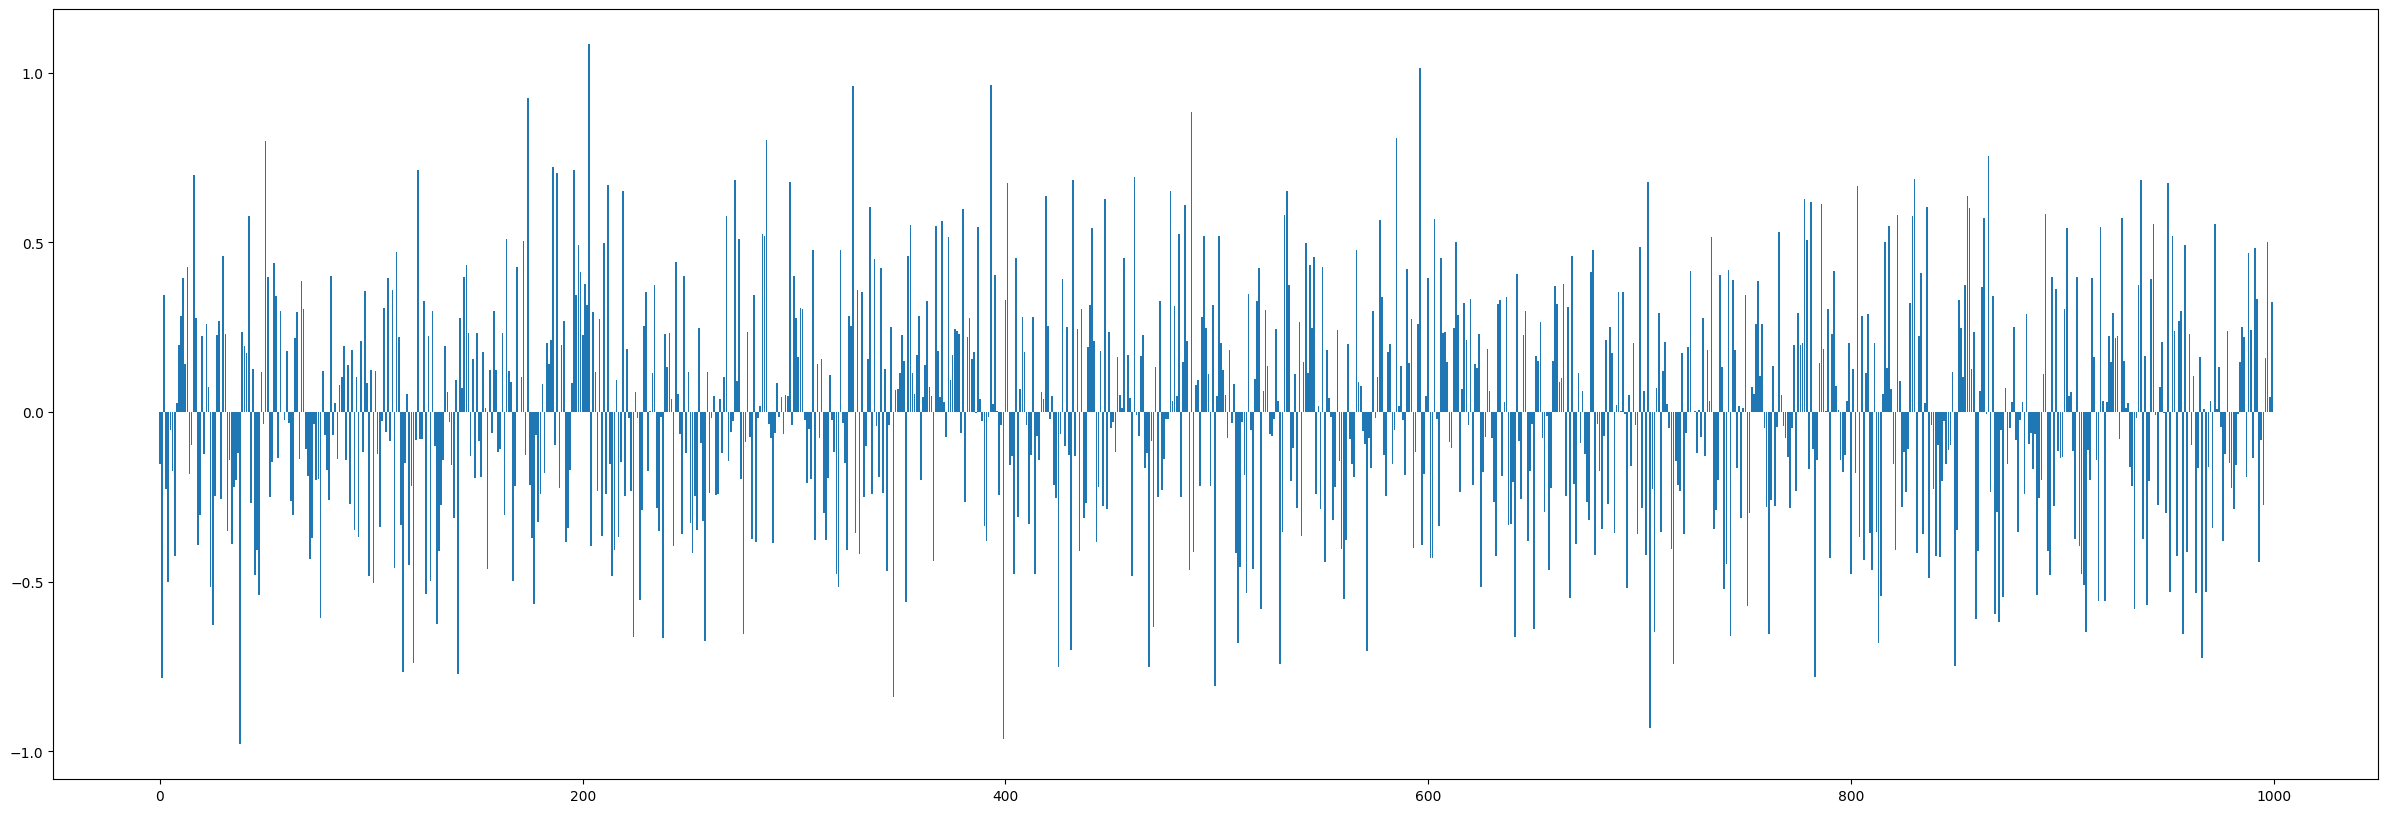

In [20]:
plt.figure(figsize=(30, 10))
plt.bar(range(1000), out.detach().numpy().reshape(-1))
plt.show()

# Configuration

In [1]:
import json
from KD_Lib.models.resnet import ResNet18, ResNet50, ResNet152

In [35]:
class Cfg:
    def __init__(self, dict=None):
        if dict is not None:
            for key in dict:
                setattr(self, key, dict[key])
            return
        
        self.MODE: str = 'shake' # 'kd' or 'dml' or 'shake'
        self.DATASET: str = 'cifar100' # 'cifar10' or 'cifar100'
        self.CLASSES: int = 100
        self.DATA_PATH: str = '../Knowledge-Distillation-Zoo/datasets/'
        self.BATCH_SIZE: int = 128
        self.TEACHER = 'resnet152' 
        self.STUDENT = 'resnet18'
        self.LR: float = 0.1
        self.LR_MIN: float = 1e-6 #1e-5
        self.T: float = 1.0
        self.W: float = 0.5
        self.EPOCHS: int = 200
        self.SCHEDULER: str = 'cos' # 'cos' or 'step'
        self.TEACHER_WEIGHTS: str = f'./models/teacher_{self.DATASET}_{self.MODE}.pt'
        self.PARALLEL: bool = False
        self.EXP: str = f"{self.MODE}_{self.DATASET}"

In [38]:
cfg = Cfg()
cfg.__dict__

{'MODE': 'shake',
 'DATASET': 'cifar100',
 'CLASSES': 10,
 'DATA_PATH': '../Knowledge-Distillation-Zoo/datasets/',
 'BATCH_SIZE': 128,
 'TEACHER': 'resnet152',
 'STUDENT': 'resnet18',
 'LR': 0.1,
 'LR_MIN': 1e-06,
 'T': 1.0,
 'W': 0.5,
 'EPOCHS': 200,
 'SCHEDULER': 'cos',
 'TEACHER_WEIGHTS': './models/teacher_cifar100_shake.pt',
 'PARALLEL': False,
 'EXP': 'shake_cifar100'}

In [39]:
with open("cfg.json", "w") as file:
    json.dump(cfg.__dict__, file)
 
with open("cfg.json", "r") as file:
    loaded_cfg = json.load(file)
 
print(loaded_cfg)

{'MODE': 'shake', 'DATASET': 'cifar100', 'CLASSES': 10, 'DATA_PATH': '../Knowledge-Distillation-Zoo/datasets/', 'BATCH_SIZE': 128, 'TEACHER': 'resnet152', 'STUDENT': 'resnet18', 'LR': 0.1, 'LR_MIN': 1e-06, 'T': 1.0, 'W': 0.5, 'EPOCHS': 200, 'SCHEDULER': 'cos', 'TEACHER_WEIGHTS': './models/teacher_cifar100_shake.pt', 'PARALLEL': False, 'EXP': 'shake_cifar100'}


In [40]:
cfg = Cfg(loaded_cfg)

In [41]:
cfg.__dict__

{'MODE': 'shake',
 'DATASET': 'cifar100',
 'CLASSES': 10,
 'DATA_PATH': '../Knowledge-Distillation-Zoo/datasets/',
 'BATCH_SIZE': 128,
 'TEACHER': 'resnet152',
 'STUDENT': 'resnet18',
 'LR': 0.1,
 'LR_MIN': 1e-06,
 'T': 1.0,
 'W': 0.5,
 'EPOCHS': 200,
 'SCHEDULER': 'cos',
 'TEACHER_WEIGHTS': './models/teacher_cifar100_shake.pt',
 'PARALLEL': False,
 'EXP': 'shake_cifar100'}

# Visualize Scheduler

In [1]:
import torch
from torch.optim.lr_scheduler import CosineAnnealingLR, LinearLR, MultiStepLR
import matplotlib.pyplot as plt

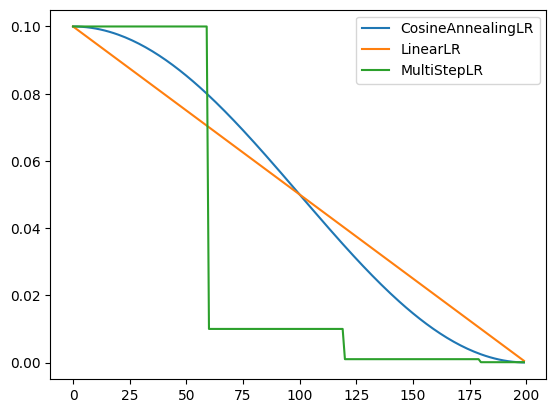

In [13]:
STEPS = 200
LR = 0.1
ETA = 1e-5

lrs = []
optimizer = torch.optim.SGD([torch.tensor(1)], lr=LR)
scheduler = CosineAnnealingLR(optimizer, STEPS, eta_min=ETA, last_epoch=-1)
for _ in range(STEPS):
    optimizer.step()
    lrs.append(scheduler.get_last_lr())
    scheduler.step()
plt.plot(lrs, label=scheduler.__class__.__name__)

lrs = []
optimizer = torch.optim.SGD([torch.tensor(1)], lr=LR)
scheduler = LinearLR(optimizer, total_iters=STEPS, start_factor=1, end_factor=ETA/LR)
for _ in range(STEPS):
    optimizer.step()
    lrs.append(scheduler.get_last_lr())
    scheduler.step()
plt.plot(lrs, label=scheduler.__class__.__name__)

lrs = []
optimizer = torch.optim.SGD([torch.tensor(1)], lr=LR)
scheduler = MultiStepLR(optimizer, [60, 120, 180], gamma=0.1)
for _ in range(STEPS):
    optimizer.step()
    lrs.append(scheduler.get_last_lr())
    scheduler.step()
plt.plot(lrs, label=scheduler.__class__.__name__)

#plt.semilogy()
plt.legend()
plt.show()